

# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  In this project I'll be analysing the 'No-show appointments' dataset that shows whether patients make an appearance for their appointments or not .In particular ,I am intrested in finding patterns on patients that show up and how they differ from those that don't show up. The following columns will be in my dataset : **PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age,  Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap,	SMS_received and No-show.**


### Question(s) for Analysis
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 
     Question 1:Age and attendance
     Question 2:Gender and attendance
     Question 3:Other factors and attendance



## Gather

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling




In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data=pd.read_csv('KaggleV2-May-2016.csv')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
#get the number of rows and columns
data.shape

(110527, 14)

# Check for missing values

In [16]:
#check for missing values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Their are not any null values


### Data Cleaning

 

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


# Convert ScheduledDay and Appointmentday from string to dateformats

In [18]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

In [19]:
#Check if the columns were changed to dateformat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

# <a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:Age and attendance

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
#get the total number of No and Yes value count
count=data['No-show'].value_counts()
count

No     88208
Yes    22319
Name: No-show, dtype: int64

In [22]:
#create describe function
def de_scribe(dataset,column):
    return dataset[column].describe()
    

In [23]:
#describe age column
de_scribe(data,"Age")

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
###Create a new column grouping the ages into different categories['Child','Young_Adult','Middle_Adults','Old_Adults']
bin_edges=[-1,17,36,54,115]
label_names=['Child','Young_Adult','Middle_Adults','Old_Adults']
data['Age_groups']=pd.cut(data['Age'],bin_edges,labels=label_names)

In [25]:
#confirm changes
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old_Adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Old_Adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old_Adults
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Old_Adults


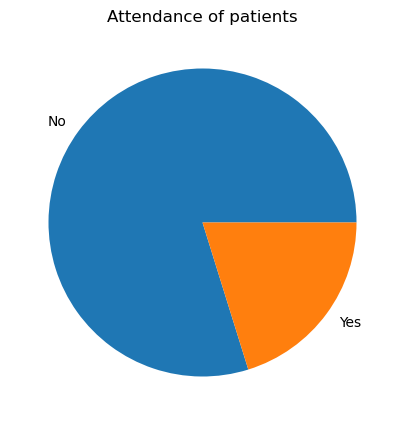

In [27]:
##Plot a bar graph for count
fig,ax=plt.subplots(figsize=(5,5))
label=['No','Yes']
ax.pie(count.values,labels=label)
ax.set_title('Attendance of patients');

# More people didn't attend their appointments

In [28]:
#Divide the data set into two ,Yes and No
show_yes=data[data['No-show']=="Yes"]
show_no=data[data['No-show']=="No"]

In [29]:
#create mean function
def mean_d(dataset,column):
    return dataset[column].mean()

In [32]:
#mean for age in Show_yes and Show_no
print(mean_d(show_yes,'Age'))
print(mean_d(show_no,'Age'))


34.31766656212196
37.790064393252315


In [34]:
##Group show_yes and show_no by age_groups
show_yes.groupby('Age_groups').mean(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age_groups,,,,,,,,,
Child,1.482744e+14,5.651605e+06,8.153243,0.123729,0.002168,0.002668,0.002001,0.014007,0.404369
Young_Adult,1.434079e+14,5.652606e+06,26.807818,0.143322,0.032108,0.011478,0.020785,0.011478,0.487979
Middle_Adults,1.485792e+14,5.652656e+06,45.325306,0.136595,0.211665,0.069238,0.063029,0.020884,0.445908
Old_Adults,1.473496e+14,5.652164e+06,66.514693,0.040789,0.532237,0.213158,0.042982,0.040351,0.404167


In [36]:
show_no.groupby('Age_groups').mean(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age_groups,,,,,,,,,
Child,1.492299e+14,5.683803e+06,7.103124,0.108502,0.001169,0.001637,0.000561,0.009447,0.261715
Young_Adult,1.447011e+14,5.682845e+06,27.190008,0.129209,0.038156,0.009587,0.017970,0.017584,0.294214
Middle_Adults,1.522531e+14,5.681727e+06,45.770681,0.111941,0.228213,0.070464,0.060187,0.022674,0.304853
Old_Adults,1.447887e+14,5.676812e+06,66.639870,0.034962,0.503098,0.194920,0.040707,0.038861,0.302844


In [37]:
#describe the Age column for Patients who didn't show up
de_scribe(show_no,'Age')

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [38]:
#describe the Age column for Patients who showed up
de_scribe(show_yes,'Age')

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

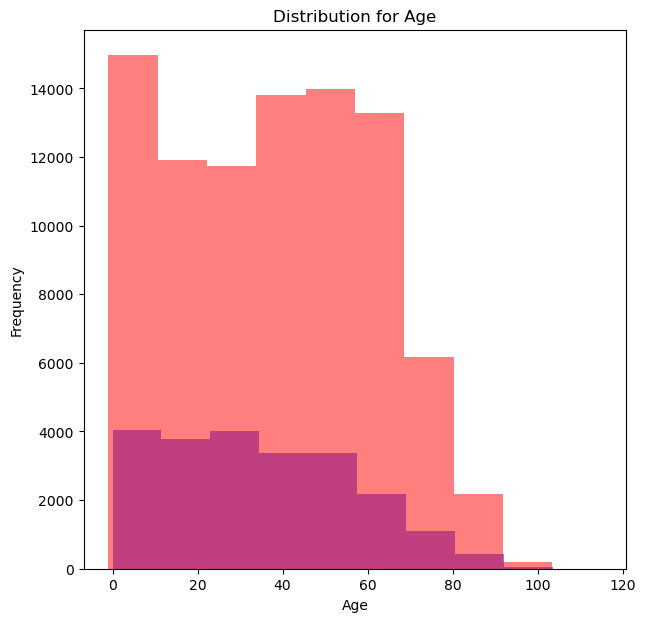

In [39]:
##Plot a histogram for Attendance on Age
fig,ax=plt.subplots(figsize=(7,7))
ax.hist(show_yes.Age,color='blue',label='Yes',alpha=0.5)
ax.hist(show_no.Age,color='red',label='No',alpha=0.5)
ax.set(title='Distribution for Age',xlabel='Age',ylabel='Frequency')
ax.legend;


# **Their is no relationship between the ages of people who attended and different,the ratios are quite similar**

###  Research Question 2 :Is their a relationship between gender and attendance

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


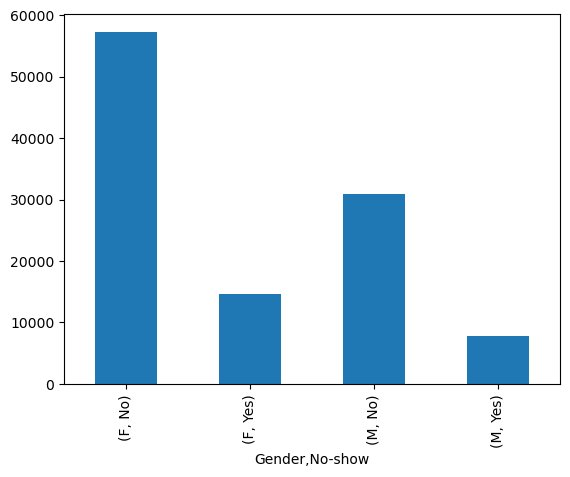

In [40]:
#Plot a bar graph for Gender,No-show
data.groupby('Gender')['No-show'].value_counts().plot.bar();

### **Their is no relationship between Gender and Attendance cause the proportion are really close**

# Research Question 3:Is their a relationship between other factors and attendance? 

In [45]:
#Group the data into groups using other factors

factor=data.groupby('No-show')['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'].sum()

C:\Users\caleb\AppData\Local\Temp\ipykernel_9384\2685944262.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  factor=data.groupby('No-show')['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'].sum()


In [32]:
factor

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,
No,8283,18029,6513,2683,2006,25698
Yes,2578,3772,1430,677,453,9784


In [46]:
#reset the index for factor
factor=factor.T.reset_index()

In [47]:
factor

No-show,index,No,Yes
0,Scholarship,8283,2578
1,Hipertension,18029,3772
2,Diabetes,6513,1430
3,Alcoholism,2683,677
4,Handcap,2006,453
5,SMS_received,25698,9784


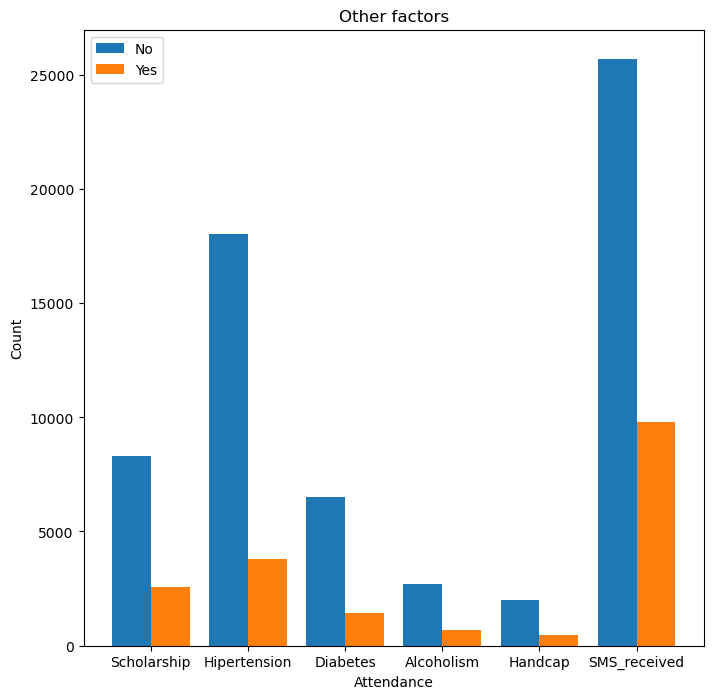

In [48]:
#Create a combined bar chart to show comparison for ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'] 
#with attendance

X=factor['index'].values
No_v=factor.No.values
Yes_v=factor.Yes.values
length=0.4


x_axis=np.arange(len(X))
fig,ax=plt.subplots(figsize=(8,8))
ax.bar((x_axis-0.2),No_v,length,label='No')
ax.bar((x_axis+0.2),Yes_v,length,label='Yes')
ax.set_xticks(x_axis)
ax.set_xticklabels(X)
ax.set(title='Other factors',xlabel='Attendance',ylabel='Count')
ax.legend();

<a id='conclusions'></a>
## Conclusions


> **According to my findings ,their are more people who missed their appointment**

> **Their is no relationship between the ages of people who attended and different,the ratios are quite similar**

> **Their is no relationship between Gender and Attendance cause the proportion are really close**

> **Their is no relationship between other variables and attendance according to my findings**

> **The limitation that I have ran across is that their are many different neighbourhoods and analysing the data from those places is hectic. I would suggest that neighbourhoods to be divided into divisions of 15 or 20.The places that are close to each other to be grouped into a specific division for example 'Divison 1' etc.**




